In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from sklearn import datasets

### wine dataset 중 alcohol과 total phenols feature 사용

In [3]:
wine = datasets.load_wine()
X = wine.data[:,[0,5]]
y = wine.target

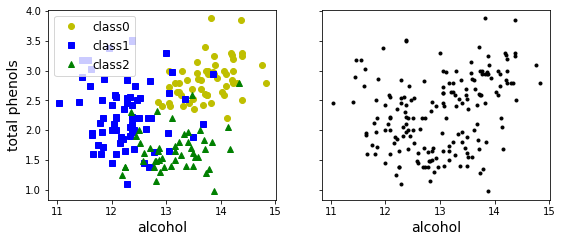

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="class0")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="class1")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="class2")
plt.xlabel("alcohol", fontsize=14)
plt.ylabel("total phenols", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:,0], X[:,1], c="k", marker=".")
plt.xlabel("alcohol", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("alcohol", fontsize=14)
    plt.ylabel("total_phenois", fontsize=14)

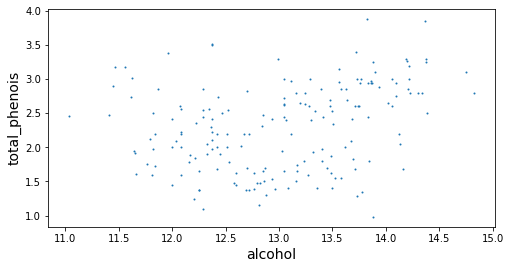

In [6]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

In [7]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [8]:
y_pred

array([2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 1, 1, 1, 4, 3, 1, 3,
       4, 1, 4, 1, 1, 2, 0, 4, 3, 1, 0, 1, 1, 4, 3, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 0, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 1, 0, 1, 3, 3, 1, 4, 3, 3, 3, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       1, 0, 0, 1, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2])

In [9]:
kmeans.cluster_centers_

array([[13.25128205,  1.58153846],
       [12.22386364,  1.85727273],
       [14.10727273,  2.97909091],
       [11.99583333,  2.76166667],
       [13.31631579,  2.64578947]])

## k가 defalut값인 5일 때, 결정경계

In [10]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], "k.", markersize=2)

def plot_centroids(centroids, weights=None, circle_color="w", cross_color="k"):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:,0], centroids[:,1], marker = "o", s=35, linewidths=8, color = circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:,1], marker = "x", s=2, linewidths=12, color = cross_color, zorder=11, alpha=1)
        
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels = True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="gist_stern")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$alcohol$", fontsize=14)
    
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$total_phenols$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)

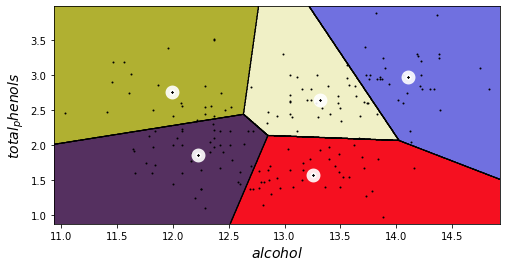

In [11]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Inertia: 그룹에 포함된 데이터들이 퍼져있는 정도
- centroid와 각 데이터들 사이의 거리를 나타냄
- 작을수록 좋음

In [12]:
kmeans.inertia_

34.924513964544225

## 군집 평가 : 최적의 k 찾기

### elbow method

In [15]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

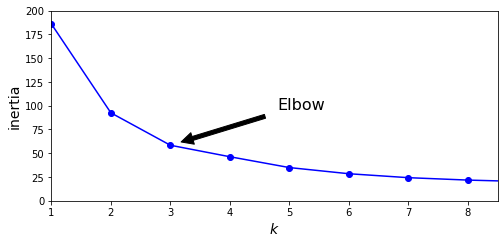

In [16]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("inertia", fontsize=14)
plt.annotate("Elbow", xy=(3, inertias[2]), xytext=(0.55, 0.55), textcoords="figure fraction", fontsize=16,
            arrowprops=dict(facecolor="black", shrink=0.1))
plt.axis([1, 8.5, 0, 200])
plt.show()

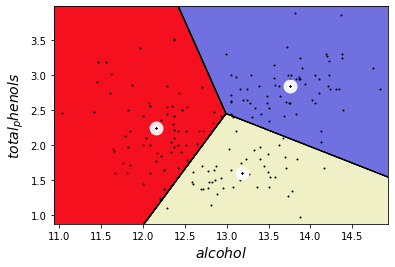

In [17]:
plot_decision_boundaries(kmeans_per_k[3-1], X)
plt.show()

### silhoutte score

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.384636165304071

In [19]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

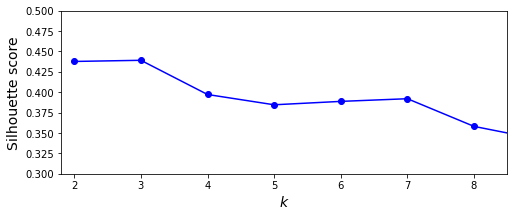

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.3, 0.5])

plt.show()

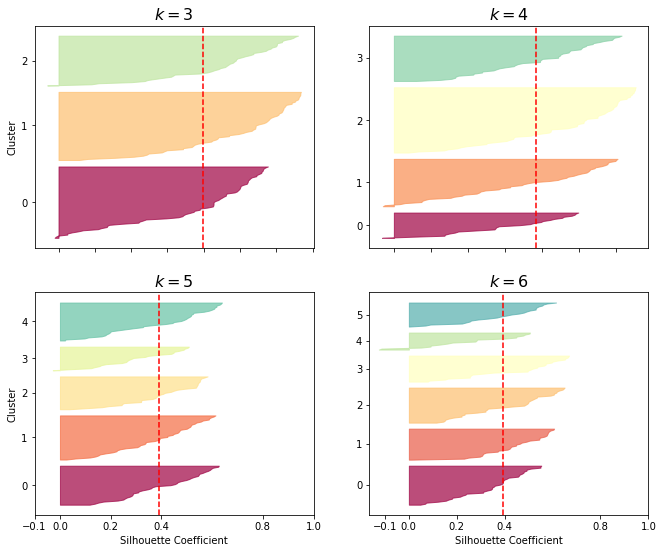

In [21]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos+len(coeffs)), 0, coeffs, facecolor = color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
        
    if k in (5,6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_scores[k-1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## 결론
    - 최적의 k: 3
    
    - 이유: elbow method에서 k의 분포에 따른 inertia 변화를 보면, k가 3일 때 기울기가 완만해지는 시기라는 것을 알 수 있다. 
    
    또한, silhouette method에서 silhouette score의 값이 1에 가장 근사한 k의 값은 3이라는 것을 알 수 있다. 
    
    최적의 k의 값이 무엇인지 찾기 위해서는 silhouette diagram 시각화 모습을 보면 된다. 
    
    silhouette diagram에서 보면 알 수 있듯이, k의 값이 3일때 silhouette score의 평균을 안정적으로 포함하고 있음을 확인할 수 있다.